# LOAD DATA

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.copy_on_write = True 
crime = pd.read_csv('Crime_Data_from_2020_to_Present.csv')

## UNDERSTANDING THE DATA

In [4]:
crime.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [5]:
crime.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

In [6]:
crime.shape

(852950, 27)

In [7]:
crime.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

In [8]:
#  checking nulls
crime.isna().sum()

division_number             0
date_reported               0
date_occurred               0
area                        0
area_name                   0
reporting_district          0
part                        0
crime_code                  0
crime_description           0
modus_operandi         118311
victim_age                  0
victim_sex             112606
victim_descent         112614
premise_code               10
premise_description       518
weapon_code            556202
weapon_description     556202
status                      0
status_description          0
crime_code_1               11
crime_code_2           790429
crime_code_3           850837
crime_code_4           852888
location                    0
cross_street           717289
latitude                    0
longitude                   0
dtype: int64

In [9]:
#  dropping columns with large null values
df = crime.drop(labels = ['modus_operandi', 'weapon_code', 'weapon_description', 'crime_code_2', 
                          'crime_code_3', 'crime_code_4', 'cross_street'], axis =1)

In [10]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,victim_sex,victim_descent,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,F,B,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,M,H,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,M,B,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487


In [97]:
df.sort_values(by = 'date_reported')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report,time
137157,202100503,2020-01-01,2020-01-01 13:15:00,21,Topanga,2189,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),75,...,Adult Arrest,343.0,20000 W VENTURA BL,34.1719,-118.5684,2020,1,2020-01-01,0,13
148151,201200504,2020-01-01,2020-01-01 04:25:00,12,77th Street,1249,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0,...,Adult Arrest,745.0,67TH ST,33.9790,-118.2827,2020,1,2020-01-01,0,4
47839,200104034,2020-01-01,2020-01-01 08:38:00,1,Central,164,1,110,CRIMINAL HOMICIDE,56,...,Adult Arrest,110.0,100 E 7TH ST,34.0446,-118.2507,2020,1,2020-01-01,0,8
47859,201004036,2020-01-01,2020-01-01 19:45:00,10,West Valley,1033,2,625,OTHER ASSAULT,59,...,Invest Cont,625.0,VICTORY,34.1866,-118.5360,2020,1,2020-01-01,0,19
8309,201004017,2020-01-01,2020-01-01 15:00:00,10,West Valley,1049,1,220,ATTEMPTED ROBBERY,36,...,Adult Other,220.0,WOODLEY,34.1867,-118.4836,2020,1,2020-01-01,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811997,230415034,2023-12-04,2023-10-24 09:00:00,4,Hollenbeck,427,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,...,Invest Cont,740.0,2500 N SOTO ST,34.0767,-118.1937,2023,10,2023-10-24,41,9
816523,231116434,2023-12-04,2023-11-30 02:00:00,11,Northeast,1145,1,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,26,...,Invest Cont,331.0,2300 ALLESANDRO ST,34.0958,-118.2535,2023,11,2023-11-30,4,2
673240,231917405,2023-12-04,2023-11-28 09:30:00,19,Mission,1954,2,946,OTHER MISCELLANEOUS CRIME,37,...,Invest Cont,946.0,10100 N SEPULVEDA BL,34.2536,-118.4674,2023,11,2023-11-28,6,9
783775,231016785,2023-12-04,2023-11-29 17:05:00,10,West Valley,1061,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0,...,Invest Cont,440.0,19800 SANTA RITA ST,34.1685,-118.5639,2023,11,2023-11-29,5,17


In [99]:
df['date_reported'] = pd.to_datetime(df['date_reported'], format = '%Y-%m-%d')

In [101]:
df['date_occurred'] = pd.to_datetime(df['date_occurred'])

In [103]:
df.dtypes

division_number                 int64
date_reported          datetime64[ns]
date_occurred          datetime64[ns]
area                            int64
area_name                      object
reporting_district              int64
part                            int64
crime_code                      int64
crime_description              object
victim_age                      int64
victim_sex                     object
victim_descent                 object
premise_code                  float64
premise_description            object
status                         object
status_description             object
crime_code_1                  float64
location                       object
latitude                      float64
longitude                     float64
year                            int32
month                           int32
date_with_notime               object
Time_to_report                  int64
time                            int32
dtype: object

In [15]:
crime

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,status,status_description,crime_code_1,crime_code_2,crime_code_3,crime_code_4,location,cross_street,latitude,longitude
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0416 0411 1822,...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",0601 0445 0416 0359,...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,1822 0344,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1822,...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [105]:
crime.describe(include = ['int64','float64'])

,division_number,area,reporting_district,part,crime_code,victim_age,premise_code,weapon_code,crime_code_1,crime_code_2,crime_code_3,crime_code_4,latitude,longitude
count,8.529500e+05,852950.000000,852950.000000,852950.000000,852950.000000,852950.000000,852940.000000,296748.000000,852939.000000,62521.000000,2113.000000,62.000000,852950.000000,852950.000000
mean,2.166969e+08,10.707354,1117.165490,1.412575,500.746338,29.742191,305.974292,363.225141,500.486350,957.630028,983.847137,990.983871,33.983232,-118.040106
std,1.100081e+07,6.097178,609.716073,0.492298,207.705242,21.799470,216.950442,123.685519,207.493864,111.237318,52.526227,27.477259,1.756263,6.089068
min,8.170000e+02,1.000000,101.000000,1.000000,110.000000,-3.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.000000,0.000000,-118.667600
25%,2.102184e+08,6.000000,615.000000,1.000000,331.000000,5.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.000000,34.014100,-118.429700
50%,2.202184e+08,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321500
75%,2.301094e+08,16.000000,1617.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163200,-118.273900
max,2.399306e+08,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [17]:
df['victim_age'].value_counts()

victim_age
 0      211842
 30      19421
 35      19008
 31      18603
 29      18552
         ...  
 97         63
-1          60
-2          13
 120         1
-3           1
Name: count, Length: 103, dtype: int64

In [117]:
#  to remove values less than 0 and nulls
df_age = df[df['victim_age'] > 0]
age_nonulls = df_age['victim_age'].value_counts()
age_nonulls

victim_age
30     19391
35     18984
31     18573
29     18526
28     18238
       ...  
95        89
96        88
98        67
97        63
120        1
Name: count, Length: 99, dtype: int64

In [19]:
#  creating a month and year column
df['year'] = df['date_occurred'].dt.year
df['month'] = df['date_occurred'].dt.month
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,102.0,SIDEWALK,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,726.0,POLICE FACILITY,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,409.0,BEAUTY SUPPLY STORE,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,222.0,LAUNDROMAT,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3


<Axes: xlabel='month'>

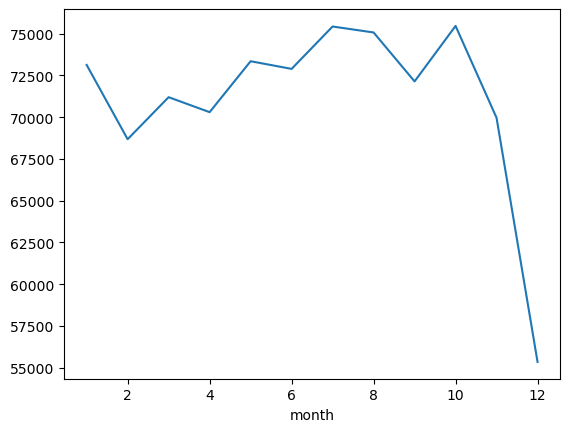

In [20]:
# crimes happening per month or year
df['month'].value_counts().sort_index().plot()

<Axes: xlabel='year'>

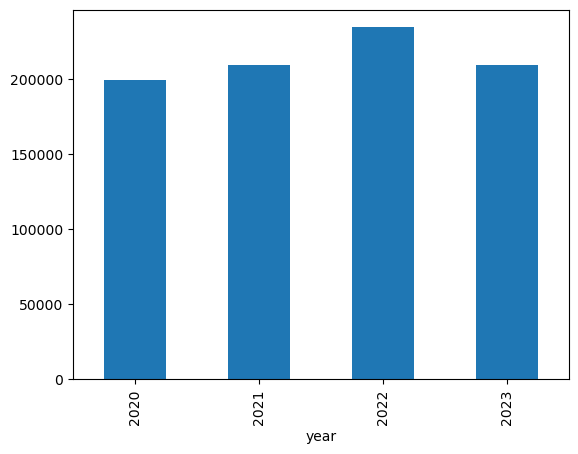

In [21]:
df['year'].value_counts().sort_index().plot(kind = 'bar')

In [22]:
# EXCLUDING A RECORD FROM THE ORIGINAL DATAFRAME
df = df[~((df['month'] == 12) & (df['year'] == 2023))]
df.sort_values(by = 'date_occurred')

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,premise_code,premise_description,status,status_description,crime_code_1,location,latitude,longitude,year,month
168264,201810982,2020-05-11,2020-01-01 00:01:00,18,Southeast,1822,2,810,"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...",17,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,810.0,400 W CENTURY BL,33.9456,-118.2808,2020,1
196441,220706832,2022-03-16,2020-01-01 00:01:00,7,Wilshire,782,2,668,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)",0,...,203.0,OTHER BUSINESS,IC,Invest Cont,668.0,1800 S FAIRFAX AV,34.0431,-118.3692,2020,1
1559,210708670,2021-05-11,2020-01-01 00:01:00,7,Wilshire,775,2,812,CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...,13,...,710.0,OTHER PREMISE,AO,Adult Other,812.0,1700 S LONGWOOD AV,34.0437,-118.3440,2020,1
199361,221818077,2022-09-28,2020-01-01 00:01:00,18,Southeast,1801,1,820,ORAL COPULATION,6,...,501.0,SINGLE FAMILY DWELLING,AO,Adult Other,812.0,500 W 92ND ST,33.9528,-118.2827,2020,1
129124,201704365,2020-01-02,2020-01-01 00:01:00,17,Devonshire,1761,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",23,...,122.0,"VEHICLE, PASSENGER/TRUCK",IC,Invest Cont,740.0,9500 OWENSMOUTH AV,34.2427,-118.6021,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672120,230717815,2023-12-01,2023-11-30 23:45:00,7,Wilshire,702,1,310,BURGLARY,30,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,700 N VISTA ST,34.0836,-118.3523,2023,11
766816,230917064,2023-12-04,2023-11-30 23:48:00,9,Van Nuys,984,1,310,BURGLARY,0,...,501.0,SINGLE FAMILY DWELLING,IC,Invest Cont,310.0,14600 SUTTON ST,34.1477,-118.4530,2023,11
770137,230221843,2023-12-01,2023-11-30 23:50:00,2,Rampart,216,1,510,VEHICLE - STOLEN,0,...,101.0,STREET,IC,Invest Cont,510.0,1000 CORONADO TR,34.0777,-118.2688,2023,11
726894,231116332,2023-12-01,2023-11-30 23:50:00,11,Northeast,1132,2,888,TRESPASSING,0,...,203.0,OTHER BUSINESS,IC,Invest Cont,888.0,3200 RIVERSIDE DR,34.1143,-118.2695,2023,11


<Axes: xlabel='year,month'>

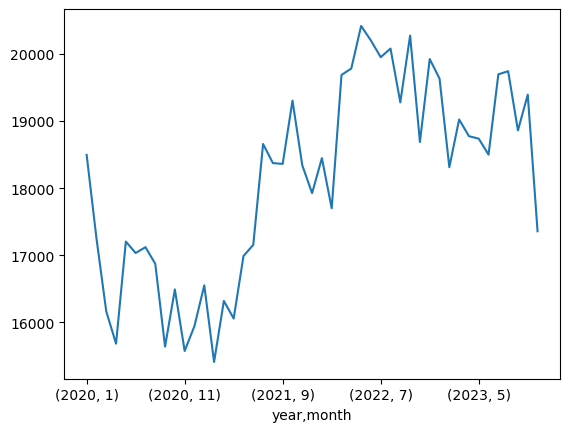

In [23]:
df.groupby(['year','month']).size().plot()

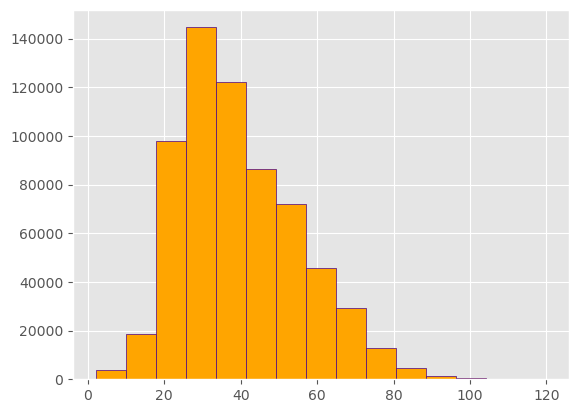

In [129]:
plt.hist(df_age['victim_age'], edgecolor = 'indigo', color = 'orange', bins = 15)
plt.show()

In [131]:
df['date_with_notime'] = df['date_occurred'].dt.date
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report,time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0,22
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1,3
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61,12
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0,17
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0,10
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0,16
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1,0
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0,9


In [133]:
crime_count_perday = df.groupby(['crime_description','date_with_notime']).size()
top_20 = crime_count_perday.groupby('crime_description').mean().reset_index(name = 'avg_dailycount')\
                              .sort_values(by = 'avg_dailycount', ascending = False).head(20)

top_20_sorted = top_20.sort_values(by = 'avg_dailycount', ascending = True)
top_20_sorted

,crime_description,avg_dailycount
135,VIOLATION OF RESTRAINING ORDER,7.517870
72,INTIMATE PARTNER - AGGRAVATED ASSAULT,8.104269
127,TRESPASSING,8.578322
15,BRANDISH WEAPON,9.252448
38,CRIMINAL THREATS - NO WEAPON DISPLAYED,12.313986
104,SHOPLIFTING - PETTY THEFT ($950 & UNDER),14.421678
130,VANDALISM - MISDEAMEANOR ($399 OR UNDER),15.772727
122,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",19.558741
99,ROBBERY,20.374126
112,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,21.452448


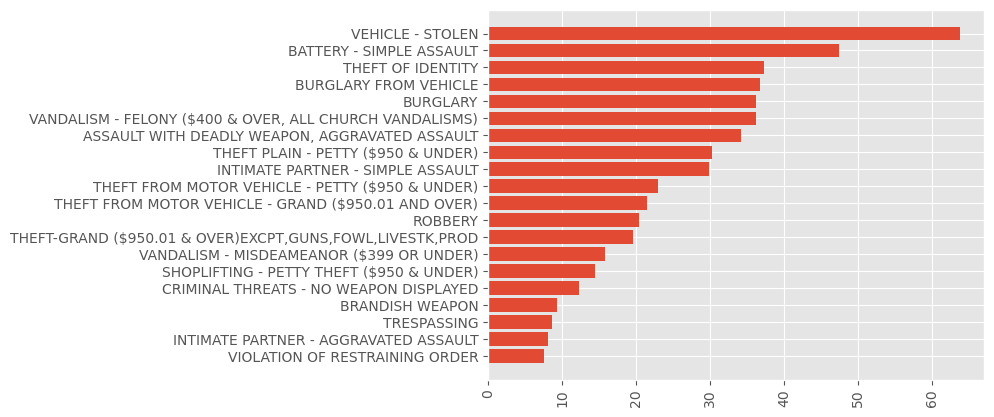

In [135]:
# top 20 crimes chart
plt.barh(top_20_sorted['crime_description'], top_20_sorted['avg_dailycount'])
plt.xticks(rotation = 90)
plt.show()

In [28]:
# plt.style.use('bmh')
plt.style.use('grayscale')
plt.style.use('ggplot')
# plt.rcdefaults()

Text(0.5, 1.0, 'Daily count v/s Crimes')

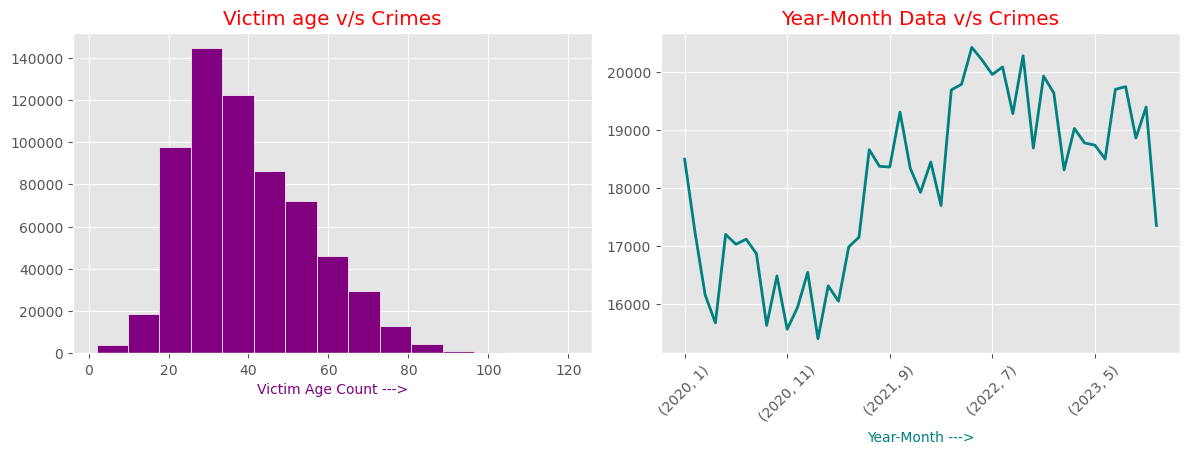

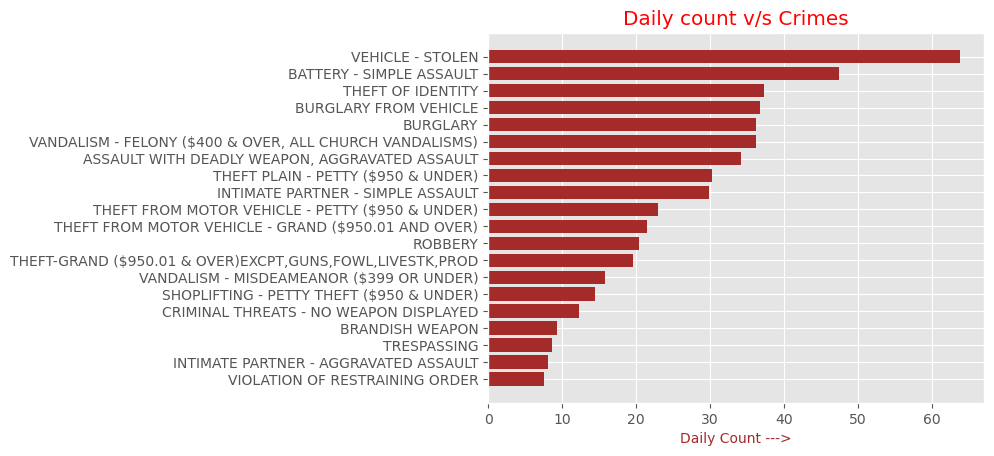

In [179]:
plt.figure(figsize = (12,8))

# USING MATPLOTLIB
plt.subplot(2,2,1)
plt.hist(df_age['victim_age'], edgecolor = 'white', color = 'purple', bins = 15)
plt.xlabel('Victim Age Count --->', fontsize = 10, color = 'purple')
plt.title('Victim age v/s Crimes', color = 'red')

# LINE CHART USING PANDAS 
plt.subplot(2,2,2)
df.groupby(['year','month']).size().plot(color = 'teal', linewidth = 2).set_xlabel('Year-Month --->', fontsize = 10, color = 'teal')
plt.xticks(rotation = 45)
plt.title('Year-Month Data v/s Crimes',color = 'red')
plt.tight_layout()

# USING MATPLOTLIB
plt.figure()
plt.barh(top_20_sorted['crime_description'], top_20_sorted['avg_dailycount'], color = 'brown')
plt.xlabel('Daily Count --->', fontsize = 10, color = 'brown')
plt.title('Daily count v/s Crimes', color = 'red')

# plt.tight_layout()

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [181]:
df['Time_to_report'] = (pd.to_datetime(df['date_reported']) - pd.to_datetime(df['date_with_notime'])).dt.days

In [32]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,IC,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,AA,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,IC,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,IC,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,IC,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,IC,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,IC,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0


In [33]:
df['Time_to_report'].value_counts().head(10)

Time_to_report
0    419620
1    185029
2     52808
3     30894
4     19932
5     14416
6     10837
7      9722
8      7053
9      5660
Name: count, dtype: int64

In [34]:
df.groupby(['crime_description'])['Time_to_report'].mean().sort_values(ascending = False).head(20)

crime_description
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    128.181013
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                   123.779056
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    110.913921
LEWD/LASCIVIOUS ACTS WITH CHILD                              97.324675
DISHONEST EMPLOYEE ATTEMPTED THEFT                           87.000000
BIGAMY                                                       77.666667
SEXUAL PENETRATION W/FOREIGN OBJECT                          66.092946
ORAL COPULATION                                              62.078616
EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)                     61.322581
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   59.657109
RAPE, FORCIBLE                                               57.628961
THEFT OF IDENTITY                                            56.288326
DOCUMENT FORGERY / STOLEN FELONY                             55.635438
SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH    

In [35]:
# top 3 crimes with average victim age per crime
df_age.groupby(['crime_description'])['victim_age'].mean().sort_values(ascending = False).head(3).reset_index()

,crime_description,victim_age
0,DISHONEST EMPLOYEE ATTEMPTED THEFT,60.000000
1,BLOCKING DOOR INDUCTION CENTER,54.666667
2,LYNCHING,53.000000


In [36]:
# AREA WITH THE HGIHEST NUMBER OF CRIMES OCCURING DURING NIGHT TIME i.e records between 8 pm to 3 am
night_time = df[(df['date_occurred'].dt.hour >= 20) | (df['date_occurred'].dt.hour < 3)]

In [37]:
night_time

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,AO,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0
5,200100501,2020-01-02,2020-01-01 00:30:00,1,Central,163,1,121,"RAPE, FORCIBLE",25,...,IC,Invest Cont,121.0,700 S BROADWAY,34.0452,-118.2534,2020,1,2020-01-01,1
7,200100504,2020-01-04,2020-01-04 00:40:00,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,0,...,IC,Invest Cont,946.0,200 E 6TH ST,34.0448,-118.2474,2020,1,2020-01-04,0
8,200100507,2020-01-04,2020-01-04 02:00:00,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",23,...,IC,Invest Cont,341.0,700 BERNARD ST,34.0677,-118.2398,2020,1,2020-01-04,0
10,200100509,2020-01-04,2020-01-04 22:00:00,1,Central,192,1,330,BURGLARY FROM VEHICLE,29,...,IC,Invest Cont,330.0,15TH,34.0359,-118.2648,2020,1,2020-01-04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852926,230406516,2023-03-19,2023-03-19 01:22:00,4,Hollenbeck,488,1,510,VEHICLE - STOLEN,0,...,IC,Invest Cont,510.0,3200 GARNET ST,34.0248,-118.2076,2023,3,2023-03-19,0
852927,230413421,2023-10-15,2023-10-15 22:45:00,4,Hollenbeck,409,2,624,BATTERY - SIMPLE ASSAULT,58,...,AO,Adult Other,624.0,5100 E HUNTINGTON DR,34.0932,-118.1615,2023,10,2023-10-15,0
852930,231514016,2023-08-27,2023-08-27 00:30:00,15,N Hollywood,1548,1,761,BRANDISH WEAPON,38,...,AO,Adult Other,761.0,11000 MCCORMICK ST,34.1660,-118.3705,2023,8,2023-08-27,0
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,IC,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1


In [38]:
night_time['area_name'].value_counts()

area_name
Central        17614
77th Street    16284
Hollywood      14570
Pacific        14254
Southwest      13899
Southeast      13724
Olympic        13271
Newton         12853
N Hollywood    12349
Rampart        12200
Wilshire       10851
Harbor         10763
Northeast      10601
West Valley    10474
West LA        10204
Van Nuys       10163
Mission        10046
Hollenbeck      9726
Devonshire      9410
Topanga         9382
Foothill        8116
Name: count, dtype: int64

In [183]:
#  HOURLY CRIME
df['time'] = df['date_occurred'].dt.hour

In [40]:
df

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report,time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0,22
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1,3
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61,12
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0,17
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0,10
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0,16
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1,0
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0,9


In [41]:
hourly = df['time'].value_counts().sort_index().reset_index()
hourly

,time,count
0,0,35061
1,1,25740
2,2,21801
3,3,19040
4,4,16099
5,5,14829
6,6,19484
7,7,21985
8,8,31428
9,9,30812


<BarContainer object of 24 artists>

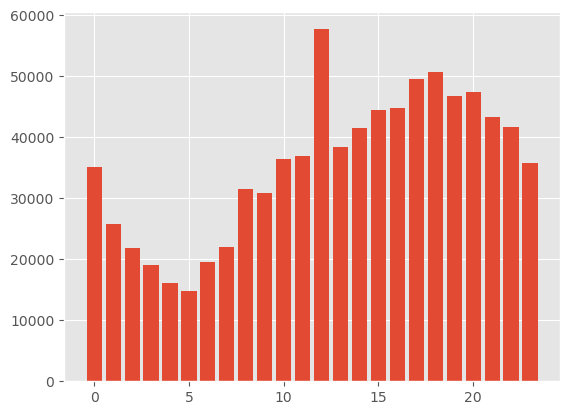

In [191]:
plt.bar(hourly['time'], hourly['count'])

In [43]:
crime_at_12 = df[df['date_occurred'].dt.hour == 12].value_counts().reset_index()
crime_at_12

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report,time,count
0,200100674,2020-03-09,2020-03-09 12:45:00,1,Central,157,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,41,...,626.0,500 STANFORD AV,34.0416,-118.2440,2020,3,2020-03-09,0,12,1
1,221513138,2022-08-05,2022-07-23 12:30:00,15,N Hollywood,1595,1,310,BURGLARY,41,...,310.0,11500 VENTURA BL,34.1397,-118.3821,2022,7,2022-07-23,13,12,1
2,221512971,2022-08-01,2022-07-29 12:00:00,15,N Hollywood,1524,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0,...,740.0,6200 LAUREL CANYON BL,34.1869,-118.3987,2022,7,2022-07-29,3,12,1
3,221513029,2022-07-27,2022-07-03 12:15:00,15,N Hollywood,1529,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",31,...,341.0,6000 CARTWRIGHT AV,34.1794,-118.3638,2022,7,2022-07-03,24,12,1
4,221513050,2022-07-27,2022-07-19 12:00:00,15,N Hollywood,1548,1,440,THEFT PLAIN - PETTY ($950 & UNDER),0,...,440.0,11000 MCCORMICK ST,34.1660,-118.3705,2022,7,2022-07-19,8,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51541,211108249,2021-05-04,2021-05-04 12:45:00,11,Northeast,1183,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),33,...,745.0,GLENDALE BL,0.0000,0.0000,2021,5,2021-05-04,0,12,1
51542,211108254,2021-05-04,2021-05-04 12:40:00,11,Northeast,1152,1,310,BURGLARY,27,...,310.0,4400 CLAYTON AV,34.1000,-118.2852,2021,5,2021-05-04,0,12,1
51543,211108307,2021-05-06,2021-04-25 12:00:00,11,Northeast,1132,2,354,THEFT OF IDENTITY,41,...,354.0,3700 ARBOLADA RD,34.1147,-118.2737,2021,4,2021-04-25,11,12,1
51544,211108312,2021-05-06,2021-05-06 12:00:00,11,Northeast,1119,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",35,...,230.0,YOSEMITE,34.1327,-118.1959,2021,5,2021-05-06,0,12,1


In [44]:
crime_at_12['crime_description'].value_counts()

crime_description
THEFT OF IDENTITY                                          9091
BATTERY - SIMPLE ASSAULT                                   3957
THEFT PLAIN - PETTY ($950 & UNDER)                         3780
BURGLARY                                                   2939
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    2586
                                                           ... 
BRIBERY                                                       1
BIGAMY                                                        1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)                  1
MANSLAUGHTER, NEGLIGENT                                       1
DRUGS, TO A MINOR                                             1
Name: count, Length: 123, dtype: int64

In [193]:
# RECORDS EXCLUDING THEFT OF IDENTITY
except_toi = df[~(df['crime_description'] == 'THEFT OF IDENTITY')]
except_toi

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,victim_age,...,status_description,crime_code_1,location,latitude,longitude,year,month,date_with_notime,Time_to_report,time
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,36,...,Adult Other,624.0,1100 W 39TH PL,34.0141,-118.2978,2020,1,2020-01-08,0,22
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,25,...,Invest Cont,624.0,700 S HILL ST,34.0459,-118.2545,2020,1,2020-01-01,1,3
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,...,Adult Arrest,845.0,200 E 6TH ST,34.0448,-118.2474,2020,2,2020-02-13,61,12
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,...,Invest Cont,745.0,5400 CORTEEN PL,34.1685,-118.4019,2020,1,2020-01-01,0,17
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,...,Invest Cont,740.0,14400 TITUS ST,34.2198,-118.4468,2020,1,2020-01-01,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852945,231606525,2023-03-22,2023-03-22 10:00:00,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",25,...,Invest Cont,230.0,12800 FILMORE ST,34.2790,-118.4116,2023,3,2023-03-22,0,10
852946,231210064,2023-04-12,2023-04-12 16:30:00,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",29,...,Invest Cont,230.0,6100 S VERMONT AV,33.9841,-118.2915,2023,4,2023-04-12,0,16
852947,230115220,2023-07-02,2023-07-01 00:01:00,1,Central,154,1,352,PICKPOCKET,24,...,Invest Cont,352.0,500 S MAIN ST,34.0467,-118.2485,2023,7,2023-07-01,1,0
852948,230906458,2023-03-05,2023-03-05 09:00:00,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),53,...,Invest Cont,745.0,14500 HARTLAND ST,34.1951,-118.4487,2023,3,2023-03-05,0,9


In [195]:
new_hourly_count = except_toi['date_occurred'].dt.hour.value_counts().sort_index().reset_index()
new_hourly_count

,date_occurred,count
0,0,29406
1,1,24243
2,2,21095
3,3,18501
4,4,15671
5,5,14208
6,6,16157
7,7,19844
8,8,27771
9,9,27752


<BarContainer object of 24 artists>

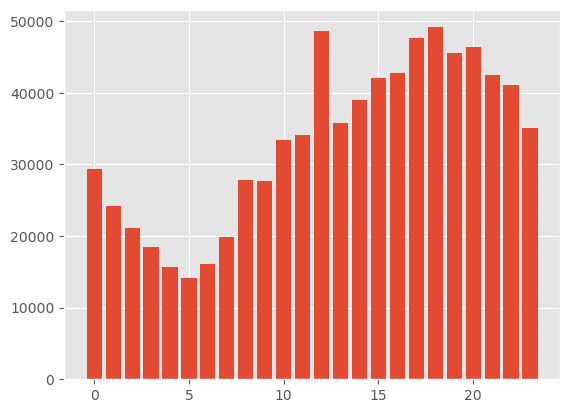

In [47]:
plt.bar(new_hourly_count['date_occurred'], new_hourly_count['count'])

In [199]:
# CRIMES AT 12 EXCEPT THEFT OF IDENTITY
except_toi[except_toi['time'] == 12]['crime_description'].value_counts().reset_index()

,crime_description,count
0,VEHICLE - STOLEN,4048
1,BATTERY - SIMPLE ASSAULT,3958
2,THEFT PLAIN - PETTY ($950 & UNDER),3785
3,BURGLARY,2945
4,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",2587
...,...,...
118,"DRUGS, TO A MINOR",1
119,"THEFT, COIN MACHINE - GRAND ($950.01 & OVER)",1
120,BIGAMY,1
121,GRAND THEFT / INSURANCE FRAUD,1
